<a href="https://colab.research.google.com/github/Imtiaj-Sajin/Face-Recognition-using-CNN/blob/main/Face_Recognition_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Files

In [ ]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Data_Path='/content/drive/MyDrive/Imagedata'
categories= os.listdir(Data_Path)
print(categories[59])

AL-NAFI


**Loop through each label folder to access the images:**

In [ ]:
!pip install pyheif
!pip install pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 69.1 MB/s eta 0:00:00


In [ ]:
!pip install opencv-python-headless


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def process_image(image, target_size=(224, 224)):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        return None  # No face detected
    for (x, y, w, h) in faces:
        # Crop the face, making the crop square
        face = image[max(y - h // 4, 0):y + h + h // 4, max(x - w // 4, 0):x + w + w // 4]
        face = cv2.resize(face, target_size)
        return face
    return Nonev

In [ ]:
from PIL import Image
import pyheif
import gc



# Function to detect face, crop to square, resize, and return image
def process_image(image, target_size=(224, 224)):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        return None  # No face detected
    for (x, y, w, h) in faces:
        # Crop the face, making the crop square
        face = image[max(y - h // 4, 0):y + h + h // 4, max(x - w // 4, 0):x + w + w // 4]
        face = cv2.resize(face, target_size)
        return face
    return None

Train_Data = []

for l, c in enumerate(categories):
    print(l)
    category_path = os.path.join(Data_Path, c)
    if len(os.listdir(category_path)) >= 10:
        for file_name in tqdm(os.listdir(category_path)):
            file_path = os.path.join(category_path, file_name)
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.heic')):
                if file_name.lower().endswith('.heic'):
                    heif_file = pyheif.read(file_path)
                    image = Image.frombytes(
                        heif_file.mode,
                        heif_file.size,
                        heif_file.data,
                        "raw",
                        heif_file.mode,
                        heif_file.stride,
                    )
                    img = np.array(image)
                else:
                    img = cv2.imread(file_path)

                if img is not None:
                    processed_img = process_image(img)
                    if processed_img is not None:
                        Train_Data.append([processed_img, l])

                # Release memory
                gc.collect()  # Force garbage collection

cv2.destroyAllWindows()


0


100%|██████████| 22/22 [00:49<00:00,  2.24s/it]


1


100%|██████████| 11/11 [00:10<00:00,  1.03it/s]


2


100%|██████████| 20/20 [01:05<00:00,  3.27s/it]


3
4
5


100%|██████████| 19/19 [01:24<00:00,  4.44s/it]


6


100%|██████████| 21/21 [00:09<00:00,  2.30it/s]


7


100%|██████████| 13/13 [00:01<00:00,  7.41it/s]


8
9
10
11
12


100%|██████████| 36/36 [01:22<00:00,  2.30s/it]


13


100%|██████████| 20/20 [00:29<00:00,  1.49s/it]


14
15
16


100%|██████████| 11/11 [00:04<00:00,  2.30it/s]


17
18
19


100%|██████████| 10/10 [00:33<00:00,  3.30s/it]


20
21


100%|██████████| 11/11 [00:24<00:00,  2.19s/it]


22


100%|██████████| 19/19 [00:23<00:00,  1.26s/it]


23


100%|██████████| 20/20 [00:45<00:00,  2.26s/it]


24
25
26


100%|██████████| 10/10 [00:18<00:00,  1.82s/it]


27


100%|██████████| 20/20 [00:09<00:00,  2.11it/s]


28
29
30
31


100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


32
33


100%|██████████| 11/11 [00:03<00:00,  3.28it/s]


34


100%|██████████| 32/32 [00:25<00:00,  1.27it/s]


35
36


100%|██████████| 10/10 [00:34<00:00,  3.44s/it]


37
38


100%|██████████| 21/21 [00:06<00:00,  3.09it/s]


39
40
41


100%|██████████| 32/32 [00:27<00:00,  1.18it/s]


42


100%|██████████| 11/11 [00:07<00:00,  1.53it/s]


43


100%|██████████| 12/12 [00:11<00:00,  1.03it/s]


44


100%|██████████| 15/15 [00:25<00:00,  1.67s/it]


45
46
47


100%|██████████| 26/26 [00:49<00:00,  1.90s/it]


48
49


100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


50


100%|██████████| 28/28 [00:04<00:00,  6.18it/s]


51
52


100%|██████████| 29/29 [01:12<00:00,  2.49s/it]


53
54
55


100%|██████████| 11/11 [00:51<00:00,  4.65s/it]


56
57


100%|██████████| 10/10 [00:13<00:00,  1.32s/it]


58


100%|██████████| 20/20 [00:47<00:00,  2.36s/it]


59


100%|██████████| 11/11 [00:16<00:00,  1.49s/it]


60
61


100%|██████████| 26/26 [00:12<00:00,  2.04it/s]


62
63


100%|██████████| 10/10 [00:03<00:00,  2.74it/s]


64
65


100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


66
67
68
69
70


100%|██████████| 10/10 [00:04<00:00,  2.13it/s]


71
72
73
74


100%|██████████| 10/10 [00:13<00:00,  1.39s/it]


75


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


In [ ]:
print(len(Train_Data))

529


In [ ]:
print(categories[59])

AL-NAFI


In [ ]:
random.shuffle(Train_Data)

array([[[ 69,  73,  68],
        [ 69,  73,  68],
        [ 72,  76,  71],
        ...,
        [184, 181, 190],
        [187, 184, 193],
        [190, 187, 196]],

       [[ 71,  75,  70],
        [ 71,  75,  70],
        [ 72,  76,  71],
        ...,
        [182, 179, 188],
        [186, 183, 192],
        [188, 185, 194]],

       [[ 68,  74,  69],
        [ 70,  76,  71],
        [ 71,  77,  72],
        ...,
        [182, 179, 188],
        [184, 181, 190],
        [187, 184, 193]],

       ...,

       [[ 58,  67, 104],
        [ 50,  60,  94],
        [ 54,  63,  97],
        ...,
        [ 55,  64, 101],
        [ 56,  67, 105],
        [ 57,  67, 107]],

       [[ 57,  66, 103],
        [ 52,  61,  95],
        [ 55,  64,  98],
        ...,
        [ 53,  62,  99],
        [ 59,  70, 108],
        [ 58,  69, 107]],

       [[ 44,  53,  89],
        [ 50,  59,  93],
        [ 51,  60,  94],
        ...,
        [ 55,  64, 101],
        [ 59,  68, 106],
        [ 57,  68, 106]]], dtype=uint8)
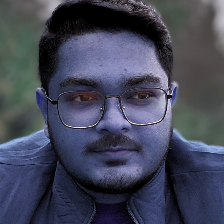

In [ ]:
Train_Data[0][0]


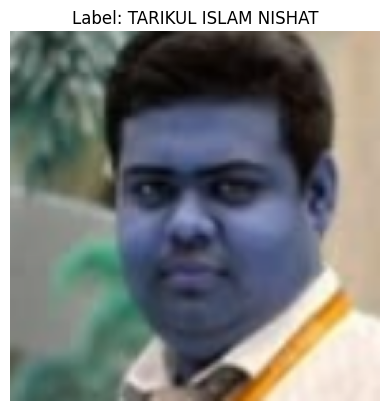

In [ ]:

image, label = Train_Data[528]

plt.imshow(image)
plt.title(f'Label: {categories[label]}')
plt.axis('off')
plt.show()


# Need to store the Train_Data for next time

In [ ]:
import pickle

file_path = "/content/drive/MyDrive/ML Data/Face Recognition/Train_Data.pkl"

with open(file_path, 'wb') as f:
    pickle.dump(Train_Data, f)

print("Train_Data saved successfully at:", file_path)


Train_Data saved successfully at: /content/drive/MyDrive/ML Data/Face Recognition/Train_Data.pkl


**Retrieve**

In [ ]:
import pickle
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/ML Data/Face Recognition/Train_Data.pkl"

with open(file_path, 'rb') as f:
    Train_Data = pickle.load(f)


print("Number of entries in Train_Data:", len(Train_Data))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of entries in Train_Data: 529


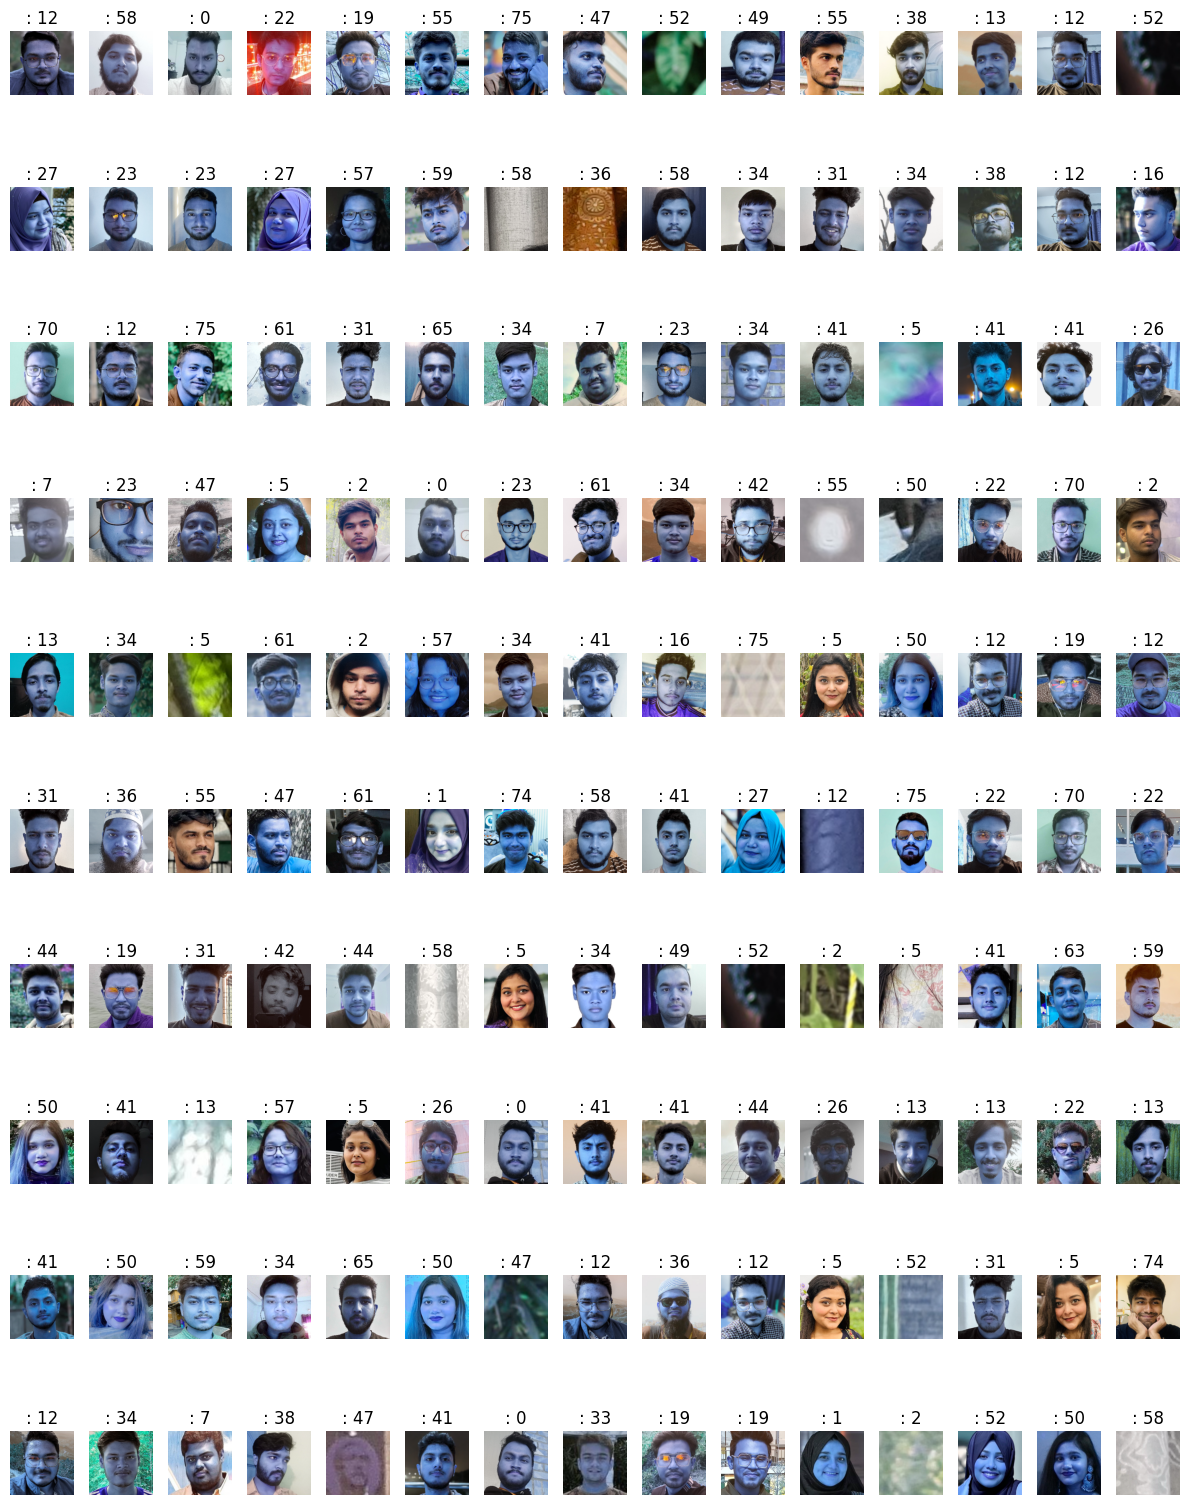

In [ ]:
import matplotlib.pyplot as plt

num_rows = 10
num_cols = 15

plt.figure(figsize=(12, 16))

for i in range(min(150, len(Train_Data))):
    img, label = Train_Data[i]
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img)
    #plt.title(f": {categories[label]}")
    plt.title(f": {label}")
    plt.axis("off")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


Number of images with label 8: 18


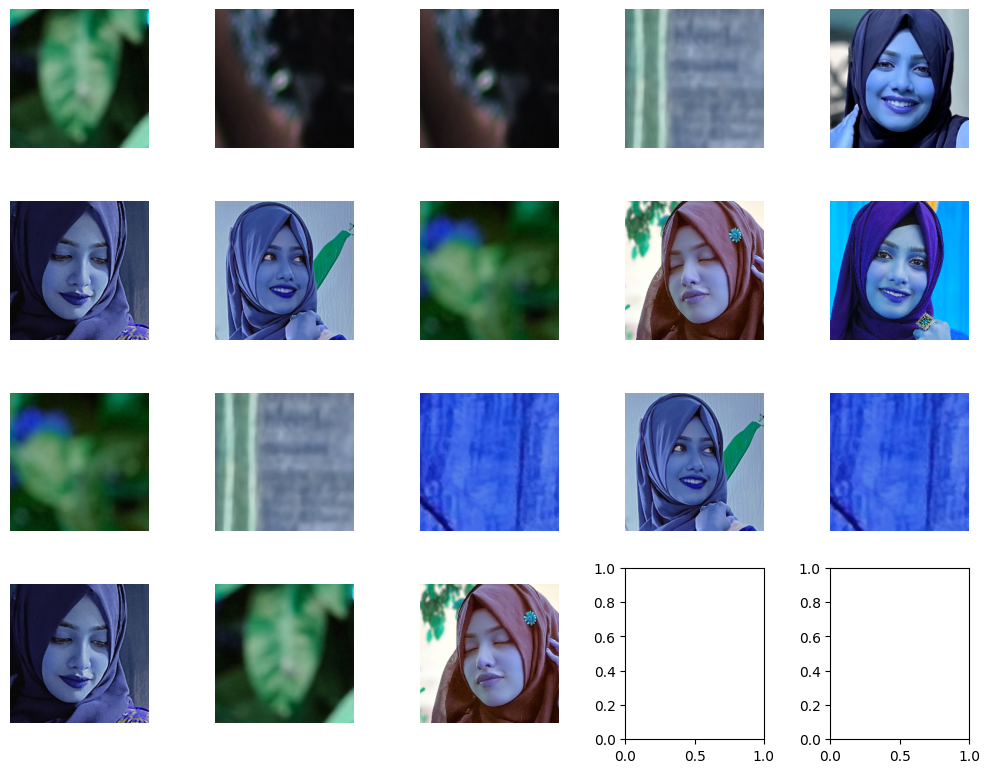

In [ ]:
#52  has some problem
p=52
images_with_problem = [image for image, label in Train_Data if label == p]
print(f"Number of images with label 8: {len(images_with_problem)}")

import matplotlib.pyplot as plt

num_images = len(images_with_problem)
if num_images > 0:
    cols = min(num_images, 5)
    rows = (num_images + cols - 1) // cols

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 2, rows * 2))
    if rows > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    for ax, image in zip(axes, images_with_problem):
        ax.imshow(image)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No images with label 8 found.")


**Train Image**

In [ ]:
import numpy as np

train_imgs=[]
train_labels=[]

for i, l in Train_Data:
    train_imgs.append(i)
    train_labels.append(l)

**Convert to numpy array**

In [ ]:
train_imgs=np.array(train_imgs)
train_labels=np.array(train_labels)


print(train_imgs.shape)
print(train_labels.shape)

(529, 224, 224, 3)
(529,)


# **Model**

In [ ]:
import numpy as np

unique_classes = np.unique(train_labels)
number_of_classes = len(unique_classes)

print(f"Number of unique classes: {number_of_classes}")

Number of unique classes: 38


## **Model create**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_5 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 76)                38988     
                                                                 
Total params: 24675788 (94.13 MB)
Trainable params: 1088076 (4.15 MB)
Non-trainable params: 23587712 (89.98 MB)
________

## **Train Model**

In [ ]:
model.fit(train_imgs, train_labels, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
15/15 [==============================] - 158s 7s/step - loss: 4.2588 - accuracy: 0.1261 - val_loss: 2.9052 - val_accuracy: 0.2264
Epoch 2/10
15/15 [==============================] - 99s 7s/step - loss: 2.4446 - accuracy: 0.3676 - val_loss: 2.3252 - val_accuracy: 0.2830
Epoch 3/10
15/15 [==============================] - 97s 6s/step - loss: 1.8102 - accuracy: 0.5105 - val_loss: 1.9067 - val_accuracy: 0.4717
Epoch 4/10
15/15 [==============================] - 97s 7s/step - loss: 1.3179 - accuracy: 0.6408 - val_loss: 1.7863 - val_accuracy: 0.4528
Epoch 5/10
15/15 [==============================] - 99s 7s/step - loss: 1.0272 - accuracy: 0.7185 - val_loss: 1.5335 - val_accuracy: 0.5849
Epoch 6/10
15/15 [==============================] - 101s 7s/step - loss: 0.7559 - accuracy: 0.8088 - val_loss: 1.3967 - val_accuracy: 0.6038
Epoch 7/10
15/15 [==============================] - 97s 6s/step - loss: 0.6293 - accuracy: 0.8403 - val_loss: 1.4359 - val_accuracy: 0.6226
Epoch 8/10
15/15 [

# `**Savve **`

In [ ]:
from keras.models import load_model

model.save("/content/drive/MyDrive/ML Data/Face Recognition.h5")



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model

model = load_model("/content/drive/MyDrive/ML Data/Face Recognition.h5")


In [ ]:
predictions = model.predict(train_imgs)

17/17 [==============================] - 110s 6s/step


In [ ]:
predictions[0]

array([2.06716853e-04, 3.84098030e-06, 1.58821087e-04, 1.02972493e-08,
       3.09287440e-09, 4.86466547e-07, 1.00844954e-04, 8.94123730e-07,
       9.72623226e-08, 4.57056215e-09, 4.85896017e-08, 3.68921693e-09,
       9.98268545e-01, 8.36504114e-06, 1.57790687e-08, 3.32458727e-09,
       2.61737841e-06, 2.12654694e-09, 2.89490600e-08, 1.78395167e-05,
       8.93027785e-09, 5.92477445e-05, 9.60389389e-06, 1.16003772e-04,
       5.52319399e-08, 8.84741496e-07, 5.71939127e-05, 2.47799071e-05,
       2.81485901e-09, 1.15911201e-08, 2.20651604e-08, 1.07400856e-05,
       3.09811909e-08, 2.85285569e-06, 1.06072439e-04, 5.03375261e-08,
       5.76704736e-07, 2.65448774e-09, 5.30832267e-06, 2.55792454e-08,
       1.25548327e-08, 4.87819216e-06, 9.93744743e-06, 8.82958375e-06,
       3.40799119e-07, 7.94829980e-09, 5.18918419e-08, 2.15147375e-04,
       5.83950555e-10, 5.79504103e-06, 1.78457003e-06, 2.58721773e-08,
       3.74139709e-05, 3.77967158e-10, 1.59790190e-08, 8.03112489e-05,
      

In [ ]:
import numpy as np

single_image = train_imgs[0]

single_image_batch = np.expand_dims(single_image, axis=0)

predictions = model.predict(single_image_batch)

predicted_class = np.argmax(predictions, axis=1)
print("Predicted class for train_imgs[2]:", predicted_class)
print(categories[predicted_class[0]])


1/1 [==============================] - 1s 540ms/step
Predicted class for train_imgs[2]: [12]
RAHAD-UL-ISLAM RABBY


In [ ]:
predictions = model.predict(train_imgs[:35])


2/2 [==============================] - 11s 672ms/step


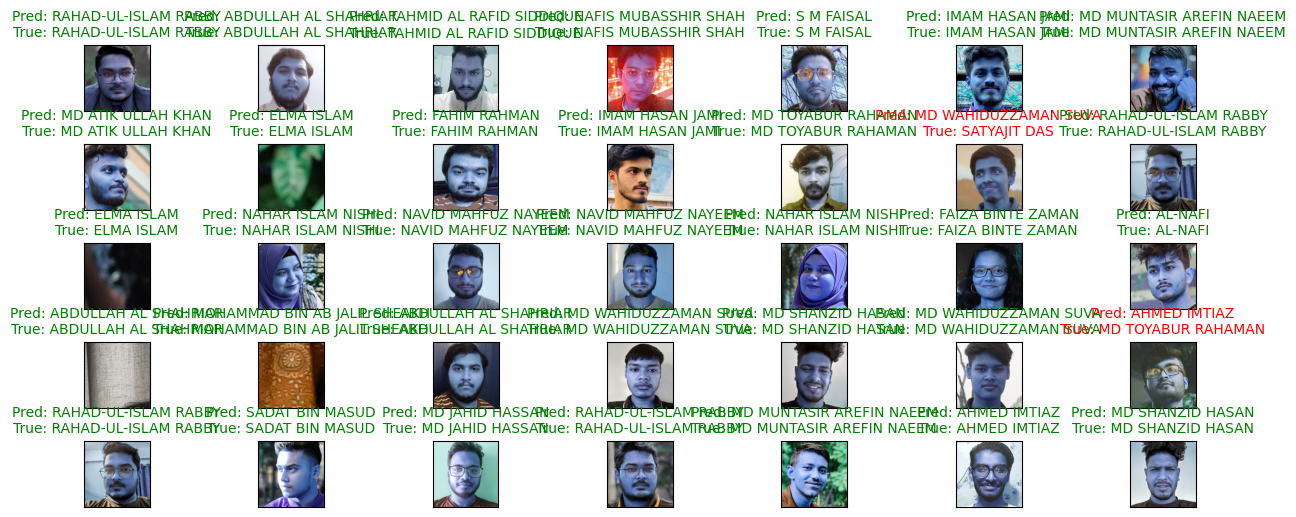

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rows = 5  # Adjusted for 10 images
cols = 7
fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    ax.imshow(train_imgs[i])
    predicted_label = categories[np.argmax(predictions[i])]
    true_label = categories[train_labels[i]]
    ax.set_title(f"Pred: {predicted_label}\nTrue: {true_label}", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    # Color the title in green if prediction is correct, else red
    ax.title.set_color('green' if predicted_label == true_label else 'red')

plt.show()


In [ ]:
!pip install opencv-python-headless


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


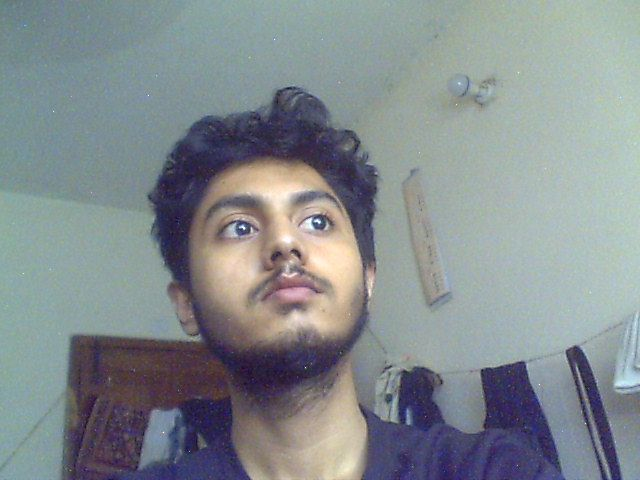

1/1 [==============================] - 0s 175ms/step
Predicted class index: MD IMTIAJ ALAM SAJIN


In [44]:
from IPython.display import Image, display
import cv2
import numpy as np

def predict_from_image(image_path):
    try:
        frame = cv2.imread(image_path)  # Ensure this reads the image file correctly
        # Check if the frame was successfully loaded
        if frame is None:
            raise ValueError(f"Unable to read image from path: {image_path}")

        # Assuming process_image is a function you've defined to preprocess images
        preprocessed_image = process_image(frame)
        if preprocessed_image is None:
            raise ValueError("Image preprocessing failed.")

        preprocessed_image = np.expand_dims(preprocessed_image, axis=0)
        predictions = model.predict(preprocessed_image)
        predicted_class = np.argmax(predictions)
        print(f"Predicted class index: {categories[predicted_class]}")

    except Exception as e:
        print(str(e))

try:
  filename = take_photo()  # This should return the path to the saved photo
  print('Saved to {}'.format(filename))

  # Display the captured photo
  display(Image(filename))

  # Pass the filename directly to the prediction function
  predict_from_image(filename)

except Exception as err:
  print(str(err))
